# McBride Lake Wind Generation EDA

In [7]:
import os, gc, math, warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import matplotlib.pyplot as plt

In [4]:
DATA_DIR = "/content/drive/MyDrive/Projects/Forecast/Canada-Wind/Data"
def read_csv(path):
    return pd.read_csv(os.path.join(DATA_DIR, path))

In [5]:
df_ake1 = read_csv("AKE1_hourly_all.csv")

In [6]:
df_ake1

,Date (MST),Date (MPT),Asset Short Name,Asset Name,Asset Grouping,Volume,Maximum Capability,System Capability,Fuel Type,Sub Fuel Type,Planning Area,Region
0,2015-01-01 00:00:00,2015-01-01 00:00:00,AKE1,AKE1 McBride Lake Windfarm,AKE1,41.459079,73.0,73.0,WIND,WIND,53,South
1,2015-01-01 01:00:00,2015-01-01 01:00:00,AKE1,AKE1 McBride Lake Windfarm,AKE1,55.432591,73.0,73.0,WIND,WIND,53,South
2,2015-01-01 02:00:00,2015-01-01 02:00:00,AKE1,AKE1 McBride Lake Windfarm,AKE1,59.567629,73.0,73.0,WIND,WIND,53,South
3,2015-01-01 03:00:00,2015-01-01 03:00:00,AKE1,AKE1 McBride Lake Windfarm,AKE1,58.928396,73.0,73.0,WIND,WIND,53,South
4,2015-01-01 04:00:00,2015-01-01 04:00:00,AKE1,AKE1 McBride Lake Windfarm,AKE1,67.226863,73.0,73.0,WIND,WIND,53,South
...,...,...,...,...,...,...,...,...,...,...,...,...
95462,2025-11-30 19:00:00,2025-11-30 19:00:00,AKE1,AKE1 McBride Lake Windfarm,AKE1,23.665545,73.0,73.0,WIND,WIND,53,South
95463,2025-11-30 20:00:00,2025-11-30 20:00:00,AKE1,AKE1 McBride Lake Windfarm,AKE1,31.504551,73.0,73.0,WIND,WIND,53,South
95464,2025-11-30 21:00:00,2025-11-30 21:00:00,AKE1,AKE1 McBride Lake Windfarm,AKE1,35.287301,73.0,73.0,WIND,WIND,53,South
95465,2025-11-30 22:00:00,2025-11-30 22:00:00,AKE1,AKE1 McBride Lake Windfarm,AKE1,39.026407,73.0,73.0,WIND,WIND,53,South


In [11]:
df_ake1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95467 entries, 0 to 95466
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date (MST)          95467 non-null  object 
 1   Date (MPT)          95467 non-null  object 
 2   Asset Short Name    95467 non-null  object 
 3   Asset Name          95467 non-null  object 
 4   Asset Grouping      95467 non-null  object 
 5   Volume              95467 non-null  float64
 6   Maximum Capability  95467 non-null  float64
 7   System Capability   95467 non-null  float64
 8   Fuel Type           95467 non-null  object 
 9   Sub Fuel Type       95467 non-null  object 
 10  Planning Area       95467 non-null  int64  
 11  Region              95467 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 8.7+ MB


In [18]:
numeric_df = df_ake1.select_dtypes(include=[np.number])
num_summary = numeric_df.agg(["min", "max", "mean"]).T
num_summary = num_summary.rename(columns={
    "min": "Min",
    "max": "Max",
    "mean": "Mean"
})
num_summary["Unique Count"] = numeric_df.nunique()
num_summary

,Min,Max,Mean,Unique Count
Volume,0.0,72.247284,22.928281,70100
Maximum Capability,73.0,73.000000,73.000000,1
System Capability,73.0,73.000000,73.000000,1
Planning Area,53.0,53.000000,53.000000,1


In [19]:
cat_df = df_ake1.select_dtypes(exclude=[np.number])

cat_summary = pd.DataFrame({
    "Unique Count": cat_df.nunique(),
    "Total Rows": len(cat_df)
})

def sample_values(s, n=5):
    uniques = s.dropna().unique()
    samples = uniques[:n]
    return ", ".join(map(str, samples))

cat_summary["Sample Values"] = cat_df.apply(sample_values)
cat_summary

,Unique Count,Total Rows,Sample Values
Date (MST),95467,95467,"2015-01-01 00:00:00, 2015-01-01 01:00:00, 2015..."
Date (MPT),95456,95467,"2015-01-01 00:00:00, 2015-01-01 01:00:00, 2015..."
Asset Short Name,1,95467,AKE1
Asset Name,1,95467,AKE1 McBride Lake Windfarm
Asset Grouping,1,95467,AKE1
Fuel Type,1,95467,WIND
Sub Fuel Type,1,95467,WIND
Region,1,95467,South


In [23]:
max_cap = 73

In [30]:
keep_cols = [
    "Date (MST)",
    "Volume"
]
df_ake1 = df_ake1[keep_cols]
df_ake1 = df_ake1.rename(columns={"Date (MST)": "Date"})

In [31]:
df_ake1

,Date,Volume
0,2015-01-01 00:00:00,41.459079
1,2015-01-01 01:00:00,55.432591
2,2015-01-01 02:00:00,59.567629
3,2015-01-01 03:00:00,58.928396
4,2015-01-01 04:00:00,67.226863
...,...,...
95462,2025-11-30 19:00:00,23.665545
95463,2025-11-30 20:00:00,31.504551
95464,2025-11-30 21:00:00,35.287301
95465,2025-11-30 22:00:00,39.026407


In [34]:
df_ake1["Date"] = pd.to_datetime(df_ake1["Date"], errors="coerce")
df_ake1["Year"] = df_ake1["Date"].dt.year

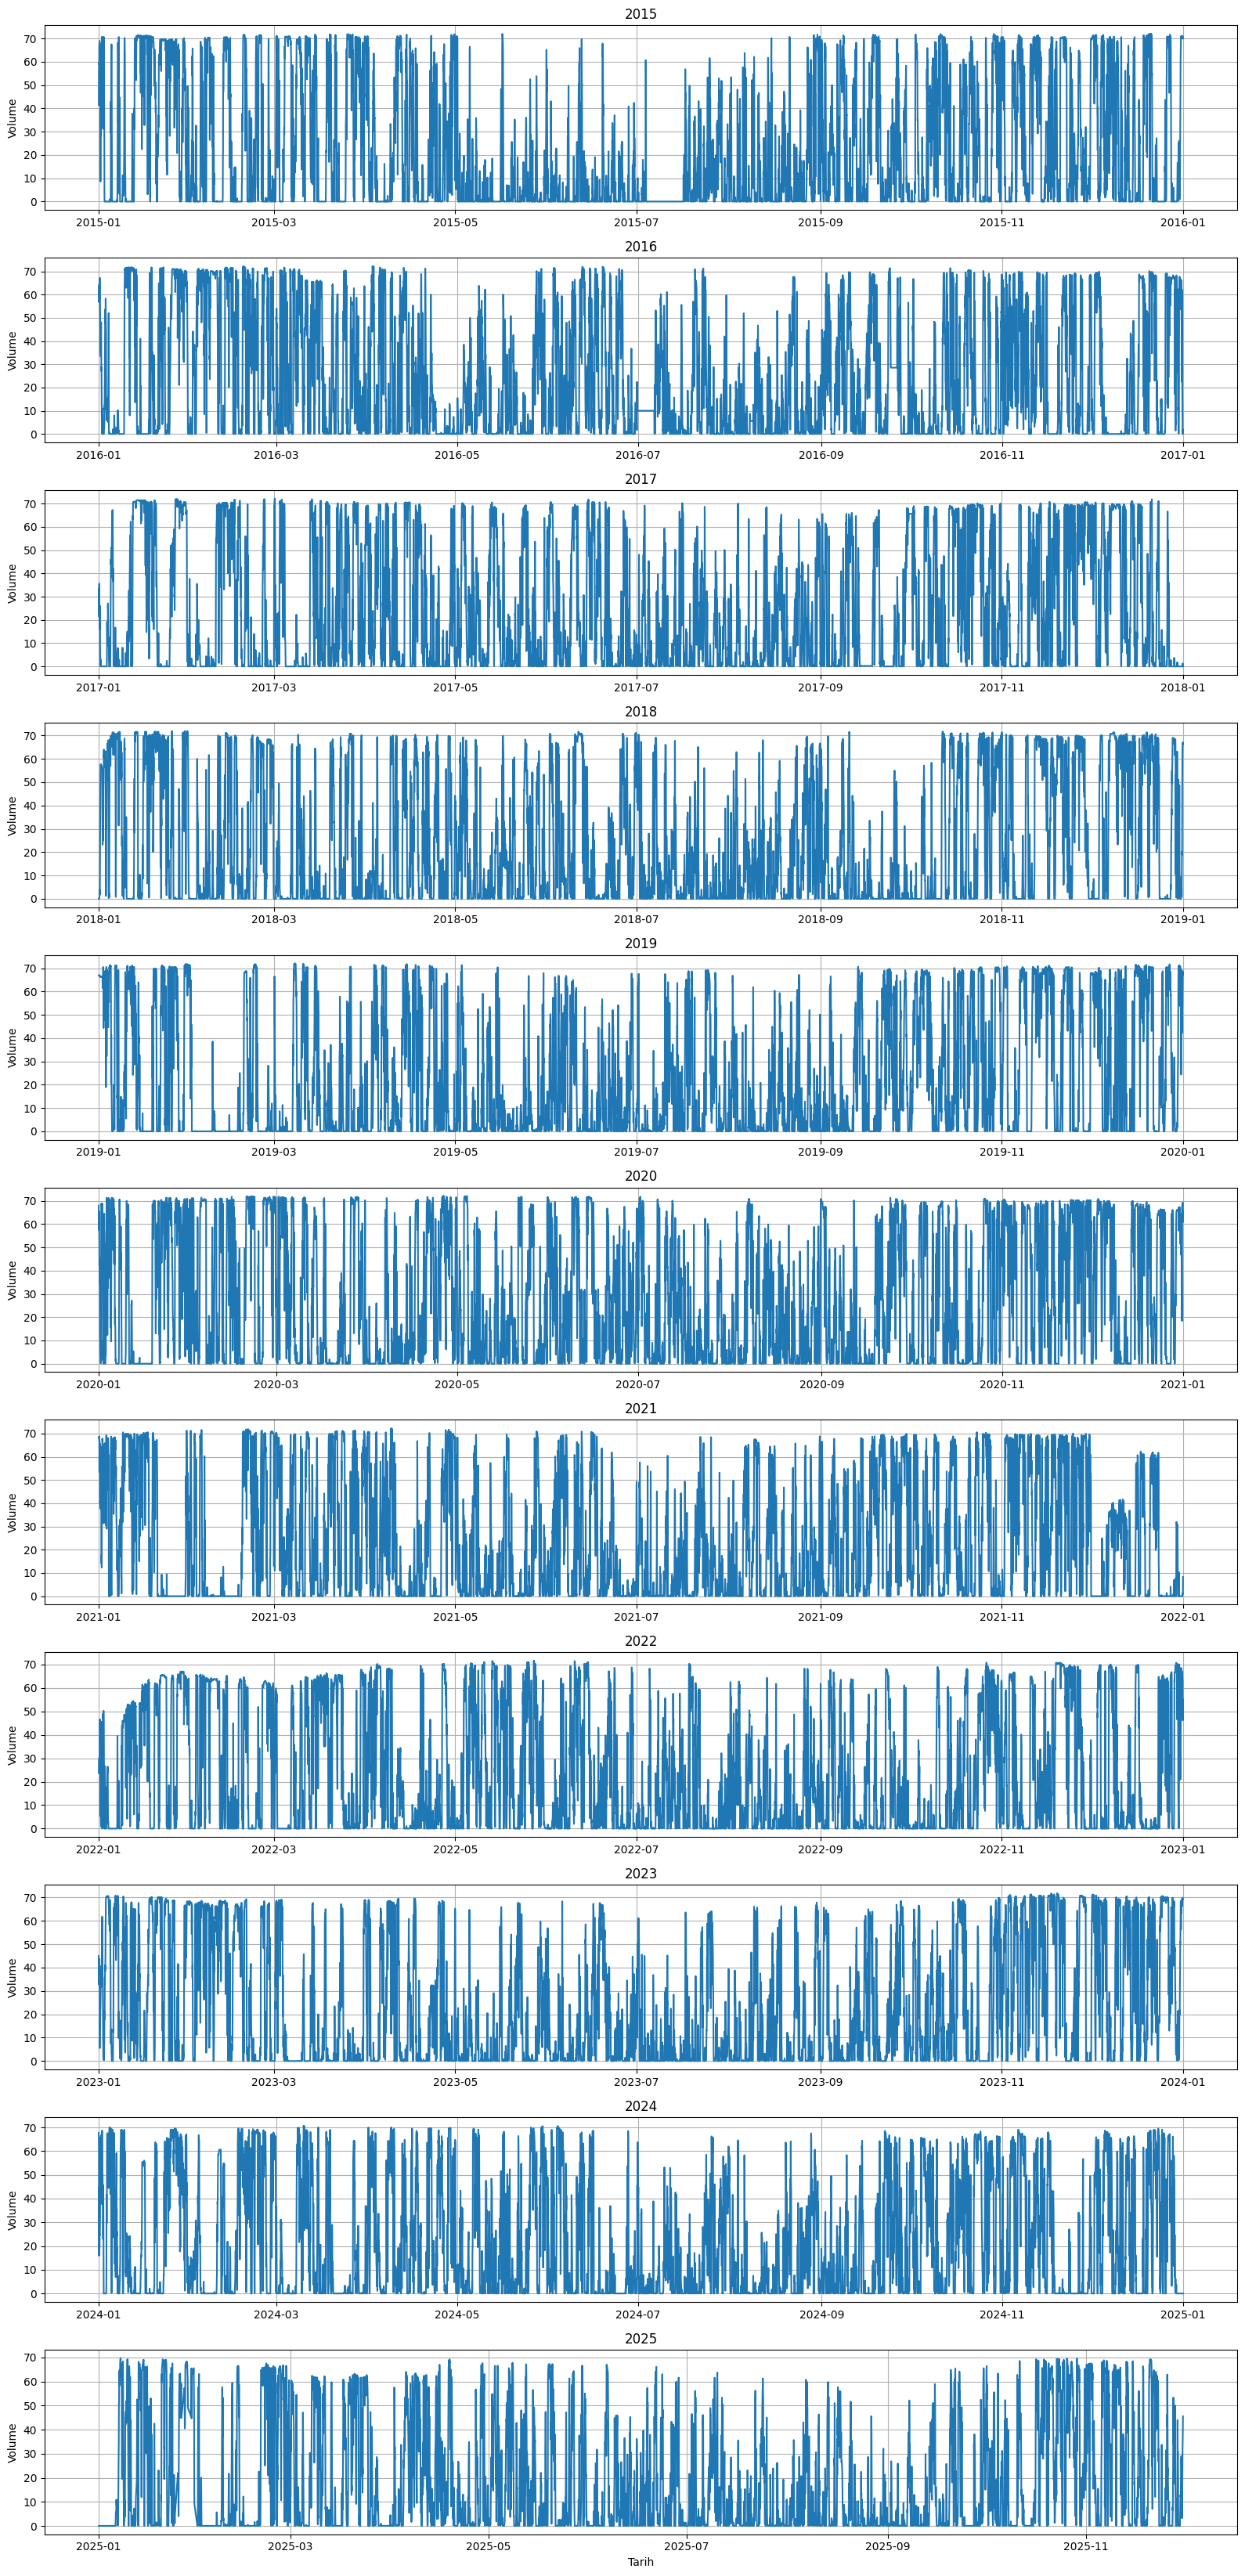

In [36]:
years = sorted(df_ake1["Year"].unique())
n_years = len(years)

fig, axes = plt.subplots(n_years, 1, figsize=(16, 3 * n_years), sharex=False)

# Tek yıl durumu için normalize
if n_years == 1:
    axes = [axes]

for ax, year in zip(axes, years):
    d = df_ake1[df_ake1["Year"] == year]
    ax.plot(d["Date"], d["Volume"])
    ax.set_title(f"{year}")
    ax.set_ylabel("Volume")
    ax.grid(True)

axes[-1].set_xlabel("Tarih")
plt.tight_layout()
plt.show()

In [37]:
df_ake1["Year"] = df_ake1["Date"].dt.year
df_ake1["Month"] = df_ake1["Date"].dt.month

In [38]:
pivot = df_ake1.pivot_table(
    index="Year",
    columns="Month",
    values="Volume",
    aggfunc="mean"
)


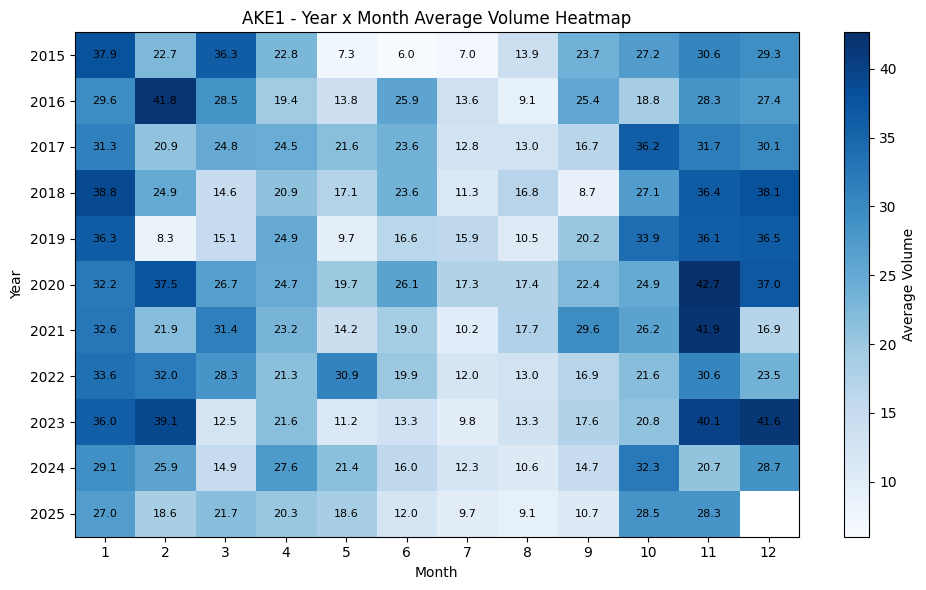

In [43]:
# @title
plt.figure(figsize=(10, 6))
img = plt.imshow(pivot, aspect="auto", cmap="Blues")

plt.xticks(
    ticks=np.arange(0, len(pivot.columns)),
    labels=pivot.columns
)
plt.yticks(
    ticks=np.arange(0, len(pivot.index)),
    labels=pivot.index
)

for i in range(pivot.shape[0]):
    for j in range(pivot.shape[1]):
        value = pivot.iloc[i, j]
        if pd.notna(value):
            plt.text(
                j,
                i,
                f"{value:.1f}",
                ha="center",
                va="center",
                fontsize=8
            )

plt.xlabel("Month")
plt.ylabel("Year")
plt.title("AKE1 - Year x Month Average Volume Heatmap")
plt.colorbar(img, label="Average Volume")

plt.tight_layout()
plt.show()

In [46]:
# @title
pivot_hour = df_ake1.pivot_table(
    index="Hour",
    columns="Month",
    values="Volume",
    aggfunc="mean"
)

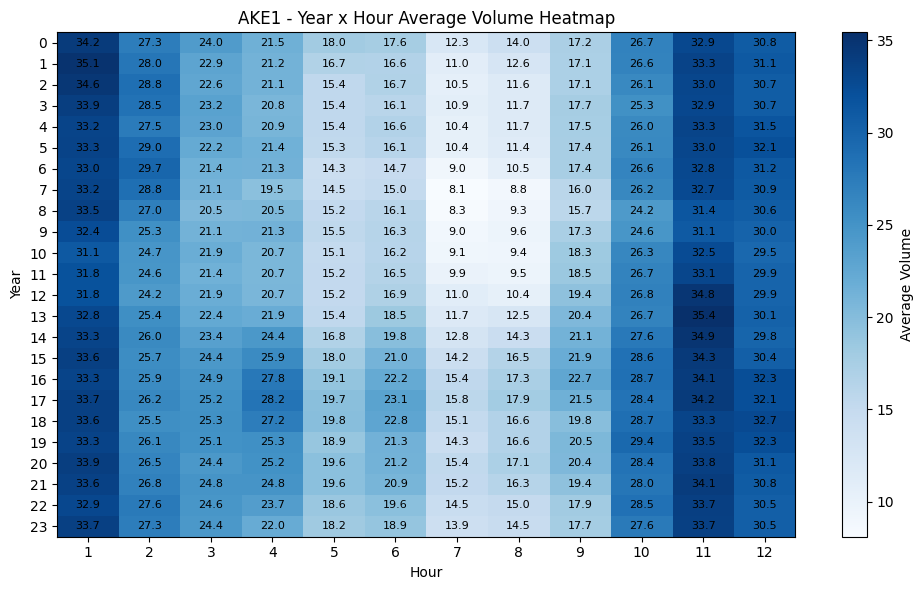

In [47]:
# @title
plt.figure(figsize=(10, 6))
img = plt.imshow(pivot_hour, aspect="auto", cmap="Blues")

plt.xticks(
    ticks=np.arange(0, len(pivot_hour.columns)),
    labels=pivot_hour.columns
)
plt.yticks(
    ticks=np.arange(0, len(pivot_hour.index)),
    labels=pivot_hour.index
)

for i in range(pivot_hour.shape[0]):
    for j in range(pivot_hour.shape[1]):
        value = pivot_hour.iloc[i, j]
        if pd.notna(value):
            plt.text(
                j,
                i,
                f"{value:.1f}",
                ha="center",
                va="center",
                fontsize=8
            )

plt.xlabel("Hour")
plt.ylabel("Year")
plt.title("AKE1 - Year x Hour Average Volume Heatmap")
plt.colorbar(img, label="Average Volume")

plt.tight_layout()
plt.show()

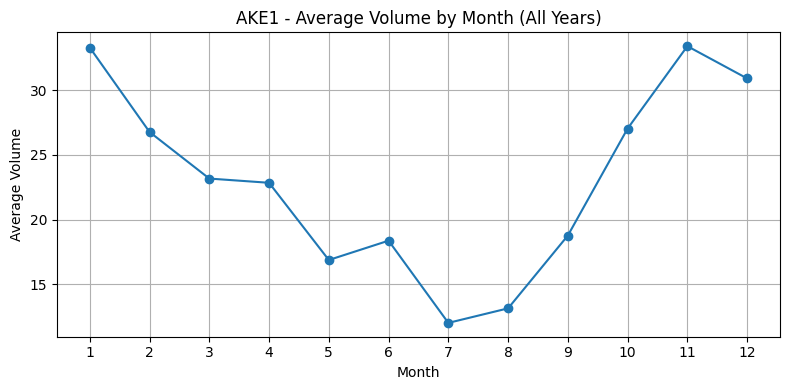

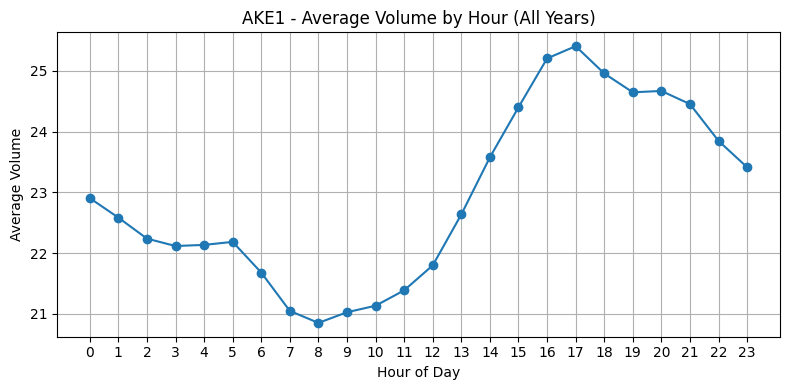

In [48]:
month_avg = df_ake1.groupby("Month")["Volume"].mean()
hour_avg = df_ake1.groupby("Hour")["Volume"].mean()

plt.figure(figsize=(8, 4))
plt.plot(month_avg.index, month_avg.values, marker="o")
plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Average Volume")
plt.title("AKE1 - Average Volume by Month (All Years)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(hour_avg.index, hour_avg.values, marker="o")
plt.xticks(range(0, 24))
plt.xlabel("Hour of Day")
plt.ylabel("Average Volume")
plt.title("AKE1 - Average Volume by Hour (All Years)")
plt.grid(True)
plt.tight_layout()
plt.show()